In [1]:
""" Experiment Settings """
depth_tree, depth_query = 5, 5
threshold_size = 100
times = 10
flag = True
res = []

In [2]:
""" Libraries """
import json
import numpy as np
import pandas as pd
import psycopg2
from matplotlib import pyplot as plt

import nbimporter
from Core import Ranges, nDTree, tree_shape_relation, draw_lines, draw_box, experiment_execution

In [51]:
""" Database Connection """
conn_params = "dbname='trajectory' user='gpadmin' host='192.168.59.101' password='1234' port=5432"
conn = psycopg2.connect(conn_params)
cur = conn.cursor()

In [52]:
""" Experiment 6-a """
sql_experiment_6_a = """
SELECT aggregation(indexing_key / 8::INTEGER, {}) AS coordinate, sum(st_length(geometry)) AS length
FROM traj
WHERE geometry IS NOT NULL
GROUP BY indexing_key / 8::INTEGER;
""".format(depth_tree - 1)

timings = []
print("experiment 6-a")
records = experiment_execution(times, timings, sql_experiment_6_a, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-a


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]

timings: [1.6924769878387451, 0.9326987266540527, 0.9404957294464111, 1.0687997341156006, 0.925501823425293, 0.9941575527191162, 0.9839754104614258, 1.0513906478881836, 0.9537529945373535, 0.9351999759674072]
median: 0.9688642024993896


In [53]:
""" Experiment 6-a-d """
sql_experiment_6_a_d = """
SELECT aggregation(indexing_key / 8::INTEGER, {}) AS coordinate, sum(st_length(geometry)) AS length
FROM traj_dist
WHERE geometry IS NOT NULL
GROUP BY indexing_key / 8::INTEGER;
""".format(depth_tree - 1)

timings = []
print("experiment 6-a-d")
records = experiment_execution(times, timings, sql_experiment_6_a_d, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-a-d


100%|██████████| 10/10 [00:11<00:00,  1.10s/it]

timings: [1.1535296440124512, 1.0101990699768066, 1.04264235496521, 1.0053868293762207, 1.007112741470337, 0.9974639415740967, 1.076810598373413, 1.0146288871765137, 1.0235655307769775, 1.6869878768920898]
median: 1.0190972089767456


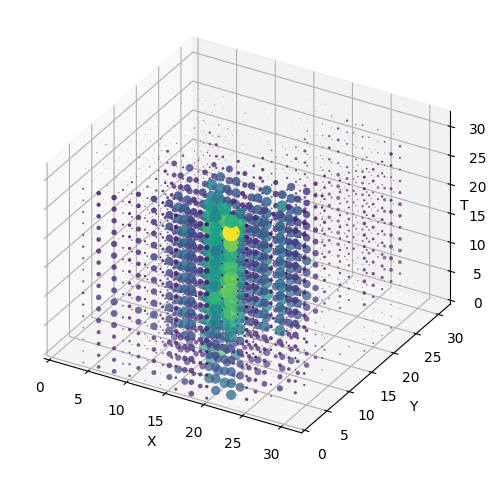

In [54]:
""" Visualization 6-a """
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(records, columns=columns)

xs = df['coordinate'].apply(lambda x: x[0] * 2)
ys = df['coordinate'].apply(lambda x: x[1] * 2)
zs = df['coordinate'].apply(lambda x: x[2] * 2)
ss = df['length'] / 10000
cmap = plt.get_cmap('viridis')
cs = cmap(ss / ss.max())

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs, ys, zs, s=ss, c=cs, edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T', labelpad=-15)
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)
ax.set_zlim(0, 32)
ax.set_proj_type('ortho')
ax.set_box_aspect([1, 1, 0.75])
plt.show()
fig.savefig("figs/t6-a.pdf", bbox_inches='tight')

In [55]:
""" Experiment 6-b """
sql_experiment_6_b = """
SELECT projection(indexing_key, {}) AS coordinate, sum(st_length(geometry)) AS length
FROM traj
WHERE geometry IS NOT NULL
GROUP BY projection(indexing_key, {});
""".format(depth_tree, depth_tree)

timings = []
print("experiment 6-b")
records = experiment_execution(times, timings, sql_experiment_6_b, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-b


100%|██████████| 10/10 [01:14<00:00,  7.49s/it]

timings: [7.488020658493042, 7.718332767486572, 7.691112041473389, 7.584184408187866, 7.758530616760254, 7.392797231674194, 7.29425311088562, 6.743039131164551, 8.177978992462158, 7.048897743225098]
median: 7.536102533340454


In [56]:
""" Experiment 6-b-d """
sql_experiment_6_b_d = """
SELECT projection(indexing_key, {}) AS coordinate, sum(st_length(geometry)) AS length
FROM traj_dist
WHERE geometry IS NOT NULL
GROUP BY projection(indexing_key, {});
""".format(depth_tree, depth_tree)

timings = []
print("experiment 6-b-d")
records = experiment_execution(times, timings, sql_experiment_6_b_d, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-b-d


100%|██████████| 10/10 [01:18<00:00,  7.83s/it]

timings: [7.045915365219116, 7.179602146148682, 7.166497707366943, 8.94200587272644, 8.434005498886108, 7.9585888385772705, 7.308110237121582, 8.05387282371521, 6.983279705047607, 9.242871522903442]
median: 7.633349537849426


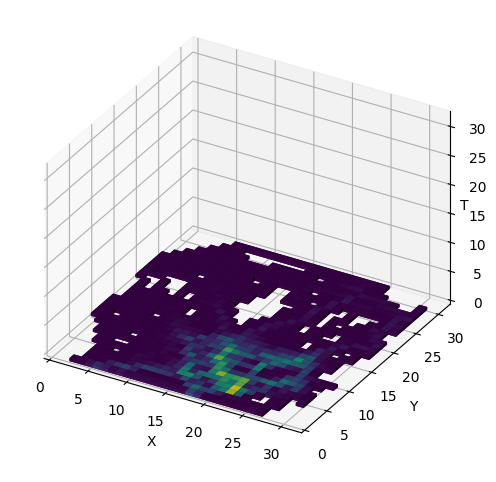

In [57]:
""" Visualization 6-b """
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(records, columns=columns)

xs = df['coordinate'].apply(lambda x: x[0]).tolist()
ys = df['coordinate'].apply(lambda x: x[1]).tolist()
cmap = plt.get_cmap('viridis')
cs = cmap(df['length'] / df['length'].max()).tolist()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

box = np.array([1, 1, 0.5])
for i in range(len(xs)):
    x = xs[i] - box[0] / 2
    y = ys[i] - box[1] / 2
    z = 0
    c = cs[i]
    ax.bar3d(x, y, z, box[0], box[1], box[2], color=c, edgecolor='none', shade='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T', labelpad=-15)
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)
ax.set_zlim(0, 32)
ax.set_proj_type('ortho')
ax.set_box_aspect([1, 1, 0.75])
plt.show()
fig.savefig("figs/t6-b.pdf", bbox_inches='tight')

In [58]:
ranges = [(376, 383), (816, 823), (912, 951), (1128, 1135), (1144, 1151), (1272, 1279), (1352, 1359), (1384, 1391), (1400, 1407), (1512, 1519), (1528, 1535), (1712, 1719), (1792, 1847), (1920, 1975), (2136, 2143), (2168, 2175), (2248, 2255), (2280, 2287), (2296, 2303), (2392, 2399), (2424, 2431), (2504, 2511), (2520, 2527), (2536, 2543), (2552, 2559), (2576, 2583), (2608, 2615), (2688, 2695), (2704, 2711), (2720, 2727), (2736, 2743), (2832, 2839), (2864, 2871), (2944, 2951), (2960, 2967),
          (2976, 2983), (2992, 2999), (3144, 3151), (3160, 3167), (3176, 3183), (3192, 3199), (3272, 3279), (3288, 3295), (3304, 3311), (3320, 3327), (3400, 3407), (3416, 3423), (3432, 3439), (3448, 3455), (3528, 3535), (3544, 3551), (3560, 3567), (3576, 3591), (3600, 3607), (3616, 3623), (3632, 3639), (3712, 3719), (3728, 3751), (3760, 3767), (3840, 3847), (3856, 3863), (3872, 3879), (3888, 3895), (3968, 3975), (3984, 3991), (4000, 4007), (4016, 4023), (16448, 16511), (16576, 16639),
          (16704, 16767), (16832, 16959), (17024, 17087), (17152, 17215), (17280, 17343), (17472, 17535), (17600, 17663), (17728, 17791), (17856, 17983), (18048, 18111), (18176, 18239), (18304, 18367), (18496, 18559), (18624, 18687), (18752, 18815), (18880, 19007), (19072, 19135), (19200, 19263), (19328, 19391), (19520, 19583), (19648, 19711), (19776, 19839), (19904, 20031), (20096, 20159), (20224, 20287), (20352, 20415)]
condition = ' OR '.join(['(%s <= indexing_key AND indexing_key <= %s )' % (r[0], r[1]) for r in ranges])

In [59]:
""" Experiment 6-c """
sql_experiment_6_c = """
SELECT st_astext(st_simplify(geometry, 1000000)) AS geometry, state
FROM traj
WHERE ({})
  AND (geometry IS NOT NULL);
""".format(condition)

timings = []
print("experiment 6-c")
records = experiment_execution(times, timings, sql_experiment_6_c, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-c


100%|██████████| 10/10 [01:39<00:00,  9.93s/it]

timings: [10.541882514953613, 10.186789274215698, 9.805083751678467, 9.628589391708374, 9.59861421585083, 10.044874429702759, 9.600304365158081, 10.15661072731018, 9.7060866355896, 10.045586109161377]
median: 9.924979090690613


In [60]:
""" Experiment 6-c-d """
sql_experiment_6_c_d = """
SELECT st_astext(st_simplify(geometry, 1000000)) AS geometry, state
FROM traj_dist
WHERE ({})
  AND (geometry IS NOT NULL);
""".format(condition)

timings = []
print("experiment 6-c-d")
records = experiment_execution(times, timings, sql_experiment_6_c_d, cur, flag)
print("timings:", timings)
print("median:", np.median(timings))
res.append(np.median(timings))

experiment 6-c-d


100%|██████████| 10/10 [01:40<00:00, 10.08s/it]

timings: [9.940149545669556, 10.505763292312622, 11.015799760818481, 10.218277931213379, 9.313015222549438, 10.651182413101196, 9.397043704986572, 9.44873595237732, 10.819358587265015, 9.453221082687378]
median: 10.079213738441467


In [61]:
""" Visualization 6-c """
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(records, columns=columns)
df.dropna(inplace=True)
#draw_lines(df, "t6-c")

In [62]:
cur.close()
conn.close()

In [63]:
print(res)

[0.9688642024993896, 1.0190972089767456, 7.536102533340454, 7.633349537849426, 9.924979090690613, 10.079213738441467]


In [3]:
num_node = [1, 2, 3, 4]
res_1 = [0.9688642024993896, 1.0190972089767456, 7.536102533340454, 7.633349537849426, 9.924979090690613, 10.079213738441467]
res_2 = [0.9852452278137207, 1.0109437704086304, 4.150885581970215, 3.913491129875183, 5.353690147399902, 5.603565573692322]
res_3 = [0.6501636505126953, 0.6443026065826416, 2.934500575065613, 2.7835590839385986, 3.9735255241394043, 4.1947181224823]
res_4 = [0.40198397636413574, 0.42205166816711426, 2.22732675075531, 2.182548761367798, 3.388598322868347, 3.2753101587295532]

In [4]:
t_6_a = []
t_6_a_d = []
t_6_b = []
t_6_b_d = []
t_6_c = []
t_6_c_d = []

all_res = [res_1, res_2, res_3, res_4]

for res in all_res:
    t_6_a.append(res[0])
    t_6_a_d.append(res[1])
    t_6_b.append(res[2])
    t_6_b_d.append(res[3])
    t_6_c.append(res[4])
    t_6_c_d.append(res[5])

In [5]:
print([round(val, 2) for val in t_6_a])
print([round(val, 2) for val in t_6_a_d])
print([round(val, 2) for val in t_6_b])
print([round(val, 2) for val in t_6_b_d])
print([round(val, 2) for val in t_6_c])
print([round(val, 2) for val in t_6_c_d])

[0.97, 0.99, 0.65, 0.4]
[1.02, 1.01, 0.64, 0.42]
[7.54, 4.15, 2.93, 2.23]
[7.63, 3.91, 2.78, 2.18]
[9.92, 5.35, 3.97, 3.39]
[10.08, 5.6, 4.19, 3.28]


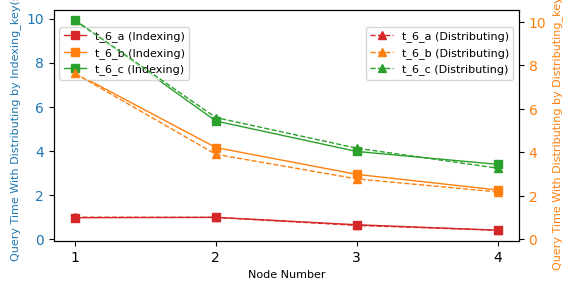

In [6]:
fig, ax1 = plt.subplots(figsize=(6, 3))

ax1.set_xlabel('Node Number', fontdict={"fontsize": 8})
ax1.set_ylabel('Query Time With Distributing by Indexing_key(s)', color='tab:blue', fontdict={"fontsize": 8})
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.plot(num_node, t_6_a, label='t_6_a (Indexing)', color='tab:red', marker='s', linewidth=1)
ax1.plot(num_node, t_6_b, label='t_6_b (Indexing)', color='tab:orange', marker='s', linewidth=1)
ax1.plot(num_node, t_6_c, label='t_6_c (Indexing)', color='tab:green', marker='s', linewidth=1)

ax2 = ax1.twinx()
ax2.set_ylabel('Query Time With Distributing by Distributing_key(s)', color='tab:orange', fontdict={"fontsize": 8})
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.plot(num_node, t_6_a_d, label='t_6_a (Distributing)', color='tab:red', marker='^', linewidth=1, linestyle='--')
ax2.plot(num_node, t_6_b_d, label='t_6_b (Distributing)', color='tab:orange', marker='^', linewidth=1, linestyle='--')
ax2.plot(num_node, t_6_c_d, label='t_6_c (Distributing)', color='tab:green', marker='^', linewidth=1, linestyle='--')

ax1.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 0.95))
ax2.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1, 0.95))
fig.savefig("figs/localization.pdf", bbox_inches='tight')
plt.xticks(num_node)
plt.show()